# Gavish-Graves TSP Results Analysis

This notebook analyzes the integrality gap results from the Gavish-Graves formulation experiments.

## 1. Import dependency needed

Import dependencies needed for analyse and setup the pandas display

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# make pandas dataframes display better in outputs
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

## 2. Load Data

Load the experimental results from the CSV file `gg_results.csv` generated by `run_gg_experiments.py`. If encounter any problem, run `python run_gg_experiments.py` first.

In [3]:
# Load results
results_df = pd.read_csv("gg_results.csv")

print(f"Total instances: {len(results_df)}")
print(f"\nProblem sizes: {sorted(results_df['n'].unique())}")
print(f"Structures: {sorted(results_df['structure'].unique())}")
print(f"Instances per structure: {results_df.groupby(['n', 'structure']).size().iloc[0]}")

results_df.head()

Total instances: 120

Problem sizes: [np.int64(15), np.int64(18), np.int64(20)]
Structures: ['clustered', 'grid', 'hub_spoke', 'random']
Instances per structure: 10


,n,structure,instance_idx,instance,IP_obj,LP_obj,gap_absolute,gap_percent,cv,lp_solve_time
0,15,grid,0,dist_n15_grid_i0.csv,770.207345,769.741418,0.465927,0.060494,0.401085,0.012926
1,15,grid,1,dist_n15_grid_i1.csv,770.536657,770.139124,0.397534,0.051592,0.401132,0.012047
2,15,grid,2,dist_n15_grid_i2.csv,770.548027,770.433680,0.114347,0.014840,0.401123,0.014476
3,15,grid,3,dist_n15_grid_i3.csv,770.511689,770.385137,0.126552,0.016424,0.401146,0.021179
4,15,grid,4,dist_n15_grid_i4.csv,770.367498,770.164988,0.202510,0.026287,0.401134,0.040900


## 3. Summary Statistics

Calculate summary statistics for each problem size and structure. 

Except for hub-spoke instances, the gap increases with n, the other structure types are very stable even when n changes. 

In [4]:
summary = results_df.groupby(['structure', 'n']).agg({
    'gap_percent': ['mean', 'std', 'min', 'max'],
    'cv': ['mean', 'std'],
    'lp_solve_time': ['mean', 'max']
}).round(4)

summary

gap_percent                                cv         lp_solve_time        
                    mean     std      min      max    mean     std          mean     max
structure n                                                                             
clustered 15     45.2733  8.6382  32.1921  58.0188  0.6404  0.0692        0.0179  0.0450
          18     42.1874  6.4818  32.9789  53.0864  0.6244  0.0742        0.0146  0.0202
          20     44.8666  6.5832  36.6730  56.2579  0.6233  0.0740        0.0225  0.0266
grid      15      0.0293  0.0201   0.0045   0.0605  0.4011  0.0000        0.0164  0.0409
          18      0.0337  0.0203   0.0100   0.0754  0.4306  0.0000        0.0159  0.0205
          20      0.0279  0.0126   0.0072   0.0451  0.4260  0.0000        0.0215  0.0238
hub_spoke 15      9.9366  1.0154   8.3846  11.4870  0.6760  0.0095        0.0117  0.0125
          18     10.8109  1.6685   8.8416  13.4500  0.6487  0.0074        0.0151  0.0167
          20     15.6006  1.3064  14.0292  18.4824  0.6488  0.0086        0.0216  0.0329
random    15     12.6419  5.0916   6.0527  21.0727  0.4596  0.0244        0.0118  0.0125
          18     13.3099  5.7660   5.4491  22.6784  0.4594  0.0204        0.0153  0.0177
          20     12.9815  6.6144   4.6881  26.7143  0.4711  0.0198        0.0211  0.0240

In [27]:
# Overall statistics by structure (across all sizes)
overall_summary = results_df.groupby('structure').agg({
    'gap_percent': ['mean', 'std', 'min', 'max'],
    'cv': 'mean',
    'lp_solve_time': 'mean',
}).round(4)

overall_summary

gap_percent                                cv lp_solve_time
                 mean     std      min      max    mean          mean
structure                                                            
clustered     44.1091  7.1822  32.1921  58.0188  0.6294        0.0165
grid           0.0303  0.0176   0.0045   0.0754  0.4192        0.0169
hub_spoke     12.1160  2.8506   8.3846  18.4824  0.6578        0.0177
random        12.9777  5.6585   4.6881  26.7143  0.4634        0.0172

## 4. Visualization: Gap Distribution by Structure

Box plot showing how the integrality gap varies across different problem structures, here we focus on n = 20.

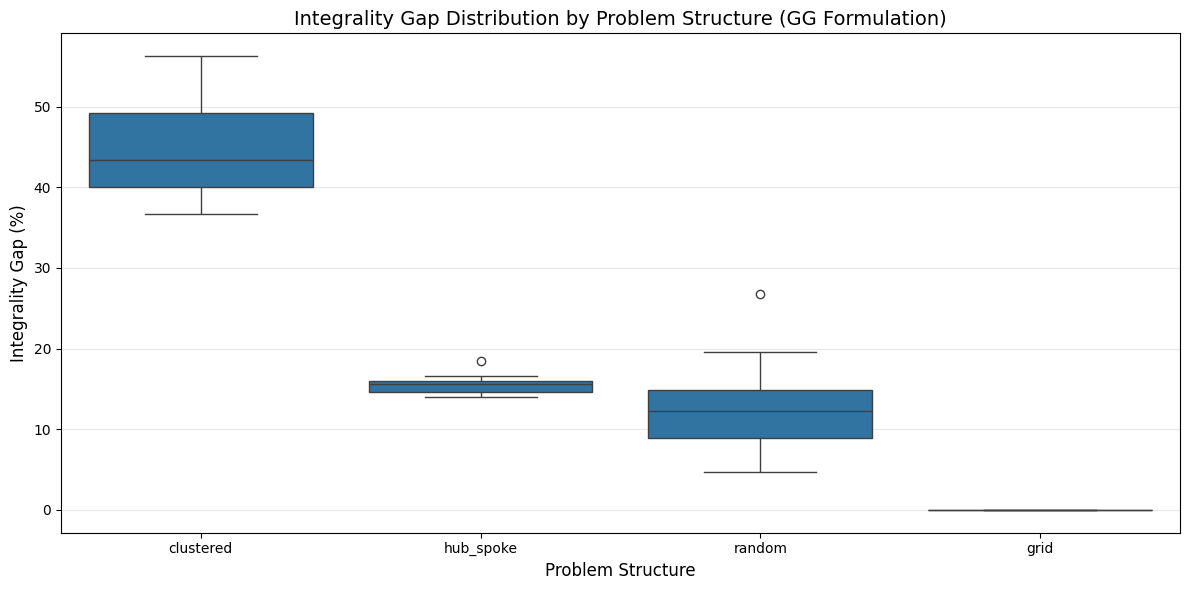

In [30]:
plt.figure(figsize=(12, 6))

data_n20 = results_df[results_df['n'] == 20]
# Sort structures by mean gap for better visualization
structure_order = data_n20.groupby('structure')['gap_percent'].mean().sort_values(ascending=False).index

sns.boxplot(data=data_n20, x='structure', y='gap_percent', order=structure_order)
plt.xlabel('Problem Structure', fontsize=12)
plt.ylabel('Integrality Gap (%)', fontsize=12)
plt.title('Integrality Gap Distribution by Problem Structure (GG Formulation)', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Visualization: Gap by Problem Size

Compare how the gap changes with problem size n for each structure.

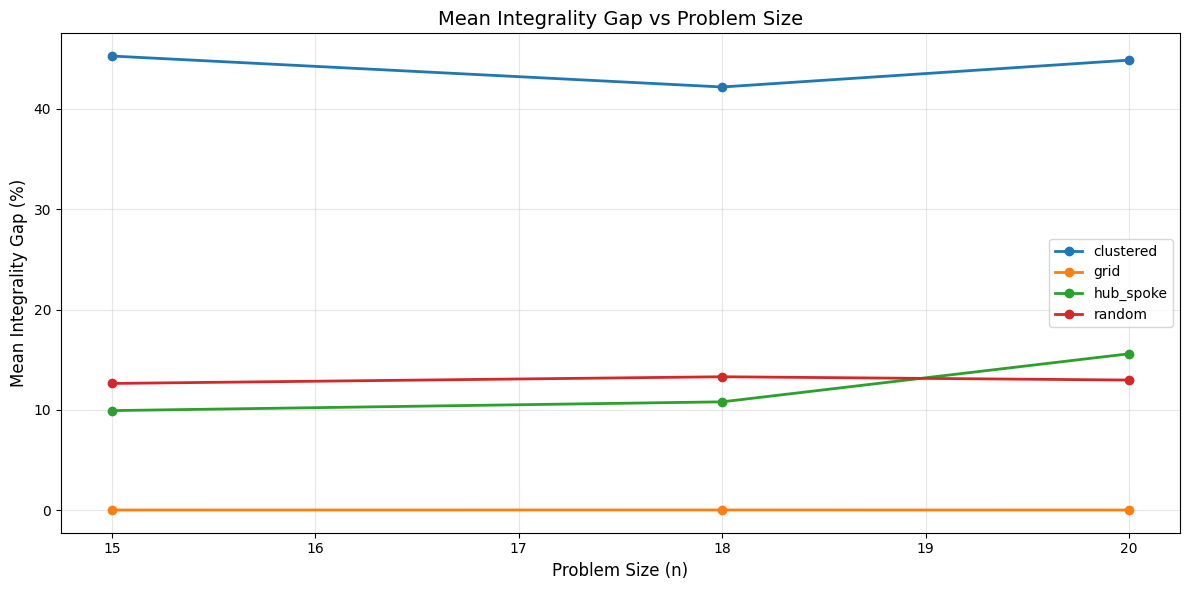

In [31]:
plt.figure(figsize=(12, 6))

gap_by_size = results_df.groupby(['n', 'structure'])['gap_percent'].mean().reset_index()

for structure in sorted(results_df['structure'].unique()):
    data = gap_by_size[gap_by_size['structure'] == structure]
    plt.plot(data['n'], data['gap_percent'], marker='o', label=structure, linewidth=2)

plt.xlabel('Problem Size (n)', fontsize=12)
plt.ylabel('Mean Integrality Gap (%)', fontsize=12)
plt.title('Mean Integrality Gap vs Problem Size', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 7. Visualization: IP vs LP Objectives

Scatter plot showing the relationship between LP relaxation and IP optimal values.

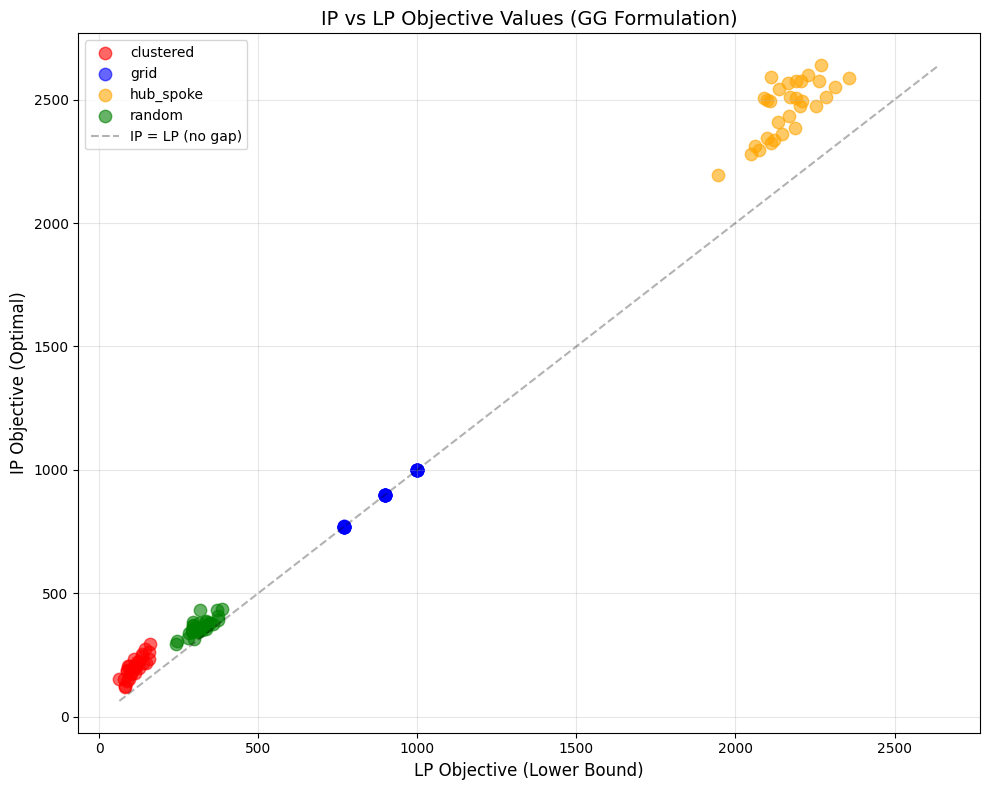

In [45]:
plt.figure(figsize=(10, 8))

colors = {'grid': 'blue', 'random': 'green', 'clustered': 'red', 'hub_spoke': 'orange'}

for structure in sorted(results_df['structure'].unique()):
    df_struct = results_df[results_df['structure'] == structure]
    plt.scatter(df_struct['LP_obj'], df_struct['IP_obj'],
               label=structure, alpha=0.6, s=80, color=colors.get(structure, 'gray'))

# Add diagonal line (IP = LP would be on this line)
min_val = min(results_df['LP_obj'].min(), results_df['IP_obj'].min())
max_val = max(results_df['LP_obj'].max(), results_df['IP_obj'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3, label='IP = LP (no gap)')

plt.xlabel('LP Objective (Lower Bound)', fontsize=12)
plt.ylabel('IP Objective (Optimal)', fontsize=12)
plt.title('IP vs LP Objective Values (GG Formulation)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Statistical Analysis
Perform statistical hypothese tests to determine if gaps differ significantly across structures.

In [46]:
# ANOVA test to check if mean gaps differ across structures
groups = [results_df[results_df['structure'] == s]['gap_percent'].values 
          for s in results_df['structure'].unique()]

f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA Test Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"\nConclusion: Gaps {'differ significantly' if p_value < 0.05 else 'do not differ significantly'} across structures (α=0.05)")

ANOVA Test Results:
F-statistic: 463.3328
P-value: 0.000000

Conclusion: Gaps differ significantly across structures (α=0.05)


## 9. Key Findings

Summarize the main observations from the analysis for only n=20. remove the data filter at the start if want to compare cross n

In [5]:
# Calculate key metrics
results_df = results_df[results_df['n'] == 20]
structure_gaps = results_df.groupby('structure')['gap_percent'].mean().sort_values(ascending=False)
largest_gap_structure = structure_gaps.index[0]
smallest_gap_structure = structure_gaps.index[-1]

print(f"\n1. Largest mean gap: {largest_gap_structure} ({structure_gaps.iloc[0]:.2f}%)")
print(f"2. Smallest mean gap: {smallest_gap_structure} ({structure_gaps.iloc[-1]:.2f}%)")
print(f"3. Overall mean gap: {results_df['gap_percent'].mean():.2f}%")
print(f"4. Gap range: {results_df['gap_percent'].min():.2f}% - {results_df['gap_percent'].max():.2f}%")
print(f"5. Mean LP solve time: {results_df['lp_solve_time'].mean():.4f} seconds")
print(f"\n6. Gap by structure:")
for structure, gap in structure_gaps.items():
    print(f"   - {structure}: {gap:.2f}%")


1. Largest mean gap: clustered (44.87%)
2. Smallest mean gap: grid (0.03%)
3. Overall mean gap: 18.37%
4. Gap range: 0.01% - 56.26%
5. Mean LP solve time: 0.0217 seconds

6. Gap by structure:
   - clustered: 44.87%
   - hub_spoke: 15.60%
   - random: 12.98%
   - grid: 0.03%
